<h1><center>Assignment No 1</center></h1>
<h1><center>Data Understanding and Exploratory Data Analysis</center></h1>


# Guidelines
1. Rename jupyter notebook as **rollnumber_firstname_lastname**.
1. You are only allowed to use pandas, numpy and seaborn libraries.
1. You are supposed to answer the question here on Jupyter notebook. Use markdown cells to answer the questions while use "Code" cells to write the code. You can double click on any markdown cell to edit it and press **shift+enter** to execute any cell.
1. Once finished, go to File menu and download the notebook as .html
1. Make sure all required figures and tables are visible in the HTML file.
1. Submit this HTML file. Note that it must follow the naming convention mentioned above.

# Import Libraries

In [9]:
# Do not modify this cell

import pandas as pd
import numpy as np
import seaborn as sns

# Import Data

In [10]:
# do not modify this cell

train_data = pd.read_csv('data/anneal.data', header=None,  
                         names = ['shape','thick','width','length','oil', 'bore', 'packing', 'classes'], 
                         sep= '\t')

In [11]:
train_data_backup = train_data
train_data.head(10)

,shape,thick,width,length,oil,bore,packing,classes
0,COIL,0.700,610.0,0,NaN,0,NaN,3
1,COIL,3.200,610.0,0,NaN,0,NaN,3
2,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,COIL,2.801,385.1,0,NaN,0,NaN,3
4,SHEET,0.801,255.0,269,NaN,0,NaN,3
5,COIL,1.600,610.0,0,NaN,0,NaN,3
6,SHEET,0.699,610.0,4880,Y,0,NaN,3
7,COIL,3.300,152.0,0,NaN,0,NaN,3
8,COIL,0.699,1320.0,0,NaN,0,NaN,3
9,SHEET,1.000,1320.0,762,NaN,0,NaN,3


# Part 1: Filling missing (NaN) values. (8 questions, 5 marks each)
**We have loaded a dataset for you and it's first 10 rows are printed. All below experiments are to be performed on the variable "train_data".**

1. Identify and enlist numerical and categorical attributes.
1. Print summary statistics of the numerical attributes of the data (mean, std, min, 25%, 50%, 75%, max, counts).
1. Write a code below that prints total number of records and total number of attributes of this data.
1. Fill the missing values with using next valid observation. For example, for **oil** column, first 6 rows would be filled with value **Y**. This is known as "backward fill". 
1. What problems would arise if you use "forward fill" instead?
1. Print summary statistics again and comment on the difference (before and after filling missing values).

**Enlist numerical and categorical attributes.**

> Numerical Attributes : Thick, width, length, bore, packing

> Categorical Attributes: Shape, Oil, Classes


In [12]:
# Print Summary statistics of numerical attribtues

#print(train_data.mean(axis=0))

print(train_data.describe())


            thick        width       length        bore   packing
count  798.000000   798.000000   798.000000  798.000000  9.000000
mean     1.181847   781.744361  1273.037594   28.195489  2.888889
std      0.861608   404.722346  1886.768139  124.811534  0.333333
min      0.250000     0.000000     0.000000    0.000000  2.000000
25%      0.601000   609.900000     0.000000    0.000000  3.000000
50%      0.800000   610.000000   611.000000    0.000000  3.000000
75%      1.600000  1250.000000   762.000000    0.000000  3.000000
max      4.000000  1525.000000  4880.000000  600.000000  3.000000


In [13]:
# Show number of records and number of attributes of the data above


print("Number of Attributes:",len(train_data.columns))
print("Number of Records:",(train_data.shape[0]))



Number of Attributes: 8
Number of Records: 798


In [14]:
# Write code to perform backward fill for all columns. Show first 10 rows.

train_data= train_data.bfill()
print(train_data.head(10))



   shape  thick   width  length oil  bore  packing classes
0   COIL  0.700   610.0       0   Y     0      3.0       3
1   COIL  3.200   610.0       0   Y     0      3.0       3
2  SHEET  0.700  1300.0     762   Y     0      3.0       3
3   COIL  2.801   385.1       0   Y     0      3.0       3
4  SHEET  0.801   255.0     269   Y     0      3.0       3
5   COIL  1.600   610.0       0   Y     0      3.0       3
6  SHEET  0.699   610.0    4880   Y     0      3.0       3
7   COIL  3.300   152.0       0   Y     0      3.0       3
8   COIL  0.699  1320.0       0   Y     0      3.0       3
9  SHEET  1.000  1320.0     762   Y     0      3.0       3


# Convert this to a "Markdown" cell and answer the question 5.

With forward fill, you fill the missing values with a value found *before* the missing row. This may still result in missing values specially in our case as the first few rows of "Oil" were missing, so there was no "previous" value to go by for a forward fill so these rows would have still remained NaN. So we would still end up with missing values so we go for backwards fill instead.


In [15]:
# Print summary statistics after filling missing values

print(train_data.describe())

#Packing field still has a few missing values which means that bfill was not sufficient.



            thick        width       length        bore     packing
count  798.000000   798.000000   798.000000  798.000000  769.000000
mean     1.181847   781.744361  1273.037594   28.195489    2.892068
std      0.861608   404.722346  1886.768139  124.811534    0.310497
min      0.250000     0.000000     0.000000    0.000000    2.000000
25%      0.601000   609.900000     0.000000    0.000000    3.000000
50%      0.800000   610.000000   611.000000    0.000000    3.000000
75%      1.600000  1250.000000   762.000000    0.000000    3.000000
max      4.000000  1525.000000  4880.000000  600.000000    3.000000


7. Now use **train_data_backup** and fill missing values by taking mode of each column. Print summary statistics of numerical attributes and comment of the difference (between backward fill and mode fill).
8. Which method of filling missing values is desirable for this particular data and why?

In [16]:
# Fill missing values of train_data_backup and print summary statistics.

for x in train_data_backup:
    train_data_backup[x]= train_data_backup[x].fillna(value=train_data_backup[x].mode()[0])

print(train_data_backup.describe())




            thick        width       length        bore     packing
count  798.000000   798.000000   798.000000  798.000000  798.000000
mean     1.181847   781.744361  1273.037594   28.195489    2.998747
std      0.861608   404.722346  1886.768139  124.811534    0.035400
min      0.250000     0.000000     0.000000    0.000000    2.000000
25%      0.601000   609.900000     0.000000    0.000000    3.000000
50%      0.800000   610.000000   611.000000    0.000000    3.000000
75%      1.600000  1250.000000   762.000000    0.000000    3.000000
max      4.000000  1525.000000  4880.000000  600.000000    3.000000


The difference between backfill and mode fill is that with backfill, we take the next value and fill the missing values BEFORE this value.
In mode fill, we just take the most frequently occurring value and fill ALL missing values with that value

# Comment on which method is better and why.

  For backwards fill, it takes the next value and fills the missing columns that came before with that value.
  However, if there are missing values at the end of the table, then backwards fill also fails to fill in all the missing columns because there is no "next" value to use. In the summary of train_data we see 769 as the count for "packing" as there were values in the end that were missing. 
  
  In mode fill, we just take the mode of the entire column I.e. the most frequently occurring value and replace all missing       values with that value. This way, as we see above in the summary for train_data_backup all rows are filled now as "packing"     also contains 798 records. So for this type of dataset, <b>mode fill</b> is better.

With mode fill, all missing values are catered to, and there isn't much of a difference in the statistical values such as std dev mean etc so it's better.



# Part 2: Correlation, Covariance and Heatmaps (4 questions, 5 marks each)
**In this data, you are provided gender income data. Your job is to find correlation and covariance between attributes.**

In [17]:
gender_data = pd.read_csv("data/gender_data.csv", sep = ',')

In [18]:
gender_data.head()

,Gender,Age,Income,City
0,F,28,90000,khi
1,F,25,75000,lhr
2,F,22,50000,lhr
3,M,27,78000,lhr
4,M,22,50000,lhr


1. Identify "Binary Symmetric Attribute", "Numerical Continuous Attribute", "Numerical Discrete Attribute" and "Categorical Discrete Attribute".
1. Write a code to convert all categorical attributes to numerical attributes (you may use dictionary to map the values to integers).
1. Write code to calculate correlation matrix and visualize it using a heatmap. Note that if you have sucessfully converted all the attributes to numerical variables, you will get a 4x4 matrix. Comment on the results. In particularly, answer the following.
 1. Does the choice of city of employment makes an impact on the earning of a particular gender?
 1. Does income variable depends on age variable?
1. Write code to calculate covariance matrix and print it. Comment on the results. What does covariance signify with respect to this dataset?


**Write down the attributes you have identified.**




Binary: Gender
Numeric Discrete: Age
Numeric Continous: Income
Categorical Discrete Attribute: City

In [19]:
# Code to convert attributes

print(gender_data.dtypes)


genders= { "F": 0,
           "M": 1}

cityList=gender_data['City'].unique().tolist()
numbers=range(len(cityList))
citiesDict= dict(zip(cityList,numbers))
gender_data['Gender']=gender_data['Gender'].replace(genders)
gender_data['City']=gender_data['City'].replace(citiesDict)
#print(dict(zip(cityList,numbers)))
print(gender_data.head())


Gender    object
Age        int64
Income     int64
City      object
dtype: object
   Gender  Age  Income  City
0       0   28   90000     0
1       0   25   75000     1
2       0   22   50000     1
3       1   27   78000     1
4       1   22   50000     1


In [20]:
# Calculate correlation

correlation = gender_data.corr()
print(correlation)

          Gender       Age    Income      City
Gender  1.000000  0.000000  0.003023  0.113961
Age     0.000000  1.000000  0.977987 -0.024776
Income  0.003023  0.977987  1.000000 -0.003790
City    0.113961 -0.024776 -0.003790  1.000000


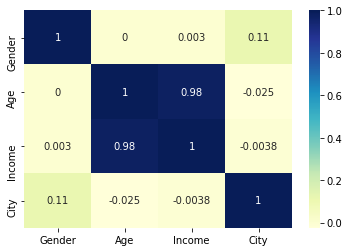

In [21]:
# Heatmap Sample
ax = sns.heatmap(correlation, annot=True, cmap="YlGnBu")

**Comments on the Heatmap above**




A) The co-efficient is 0.11 for city and gender so the city does not really have an impact on the earning of a particular gender as the co-efficient magnitude is too small.

B) Yes, both are highly correlated with a value of 0.98 so they have a strong dependency as correlation implies dependence..

In [22]:
# Caclulate covariance matrix and print it (4x4 matrix)
cov= gender_data.cov()
print(cov)



           Gender           Age        Income       City
Gender   0.255814      0.000000  2.325581e+01   0.046512
Age      0.000000      5.412262  3.460465e+04  -0.046512
Income  23.255814  34604.651163  2.313256e+08 -46.511628
City     0.046512     -0.046512 -4.651163e+01   0.651163


**Comments on the Covariance**





Covariance matrix with respect to this dataset signifies that Gender and Age have an impact on Income whereas the City may not.
<ul> Income and gender have positive coefficient. Income is more for Male gender as the value 1 was assigned to males and 0 for females. </ul>
    <ul> The higher the age, the larger the income as shown by the covariance value </ul>
    <ul> The city of employment does show negative covariance which means that as we go from Karachi to islamabad to lahore, income tends to decrease, but not by much due to low magnitude of covariance value. I assigned the values 0, 1, 2 to karachi, islamabad, and lahore respectively. </ul>
